In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np 

In [2]:
#Read csv into pandas Dataframe
coffee_original_df = pd.read_csv("Resources/NEW_coffee_final.csv")

In [3]:
coffee_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   slug                    4509 non-null   object 
 1   name                    4509 non-null   object 
 2   roaster                 4509 non-null   object 
 3   roast                   4399 non-null   object 
 4   country_of_origin       4509 non-null   object 
 5   desc_1                  4509 non-null   object 
 6   desc_2                  4509 non-null   object 
 7   rating                  4509 non-null   int64  
 8   aroma                   4475 non-null   float64
 9   acid                    3685 non-null   float64
 10  body                    4499 non-null   float64
 11  flavor                  4496 non-null   float64
 12  aftertaste              4091 non-null   float64
 13  region_africa_arabia    4509 non-null   int64  
 14  region_caribbean        4509 non-null   

In [4]:
# Create features and target
coffee_test = coffee_original_df[['aroma','body','flavor','acid','aftertaste','slug']]
coffee_test = coffee_test.dropna()
X = coffee_test[['aroma','body','flavor','acid','aftertaste']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3332 entries, 0 to 4106
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aroma       3332 non-null   float64
 1   body        3332 non-null   float64
 2   flavor      3332 non-null   float64
 3   acid        3332 non-null   float64
 4   aftertaste  3332 non-null   float64
dtypes: float64(5)
memory usage: 156.2 KB


In [5]:
y = coffee_test['slug']
y

0              /review/ethiopia-deri-kochoha-2
2               /review/kenya-ruthaka-peaberry
3            /review/ethiopia-gora-kone-sidamo
5        /review/honduras-las-flores-parainema
6                        /review/kivu-dr-congo
                         ...                  
4102               /review/tanzania-peaberry-2
4103    /review/cafe-quindio-gourmet-colombian
4104                /review/la-mattina-sumatra
4105                   /review/decaf-sumatra-4
4106                        /review/sumatra-11
Name: slug, Length: 3332, dtype: object

In [6]:
# Show Standardise data scale for aroma, acidity, body, balance 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [7]:
scaled_data

array([[ 0.7316112 ,  1.31749907,  0.51316541,  0.08046062,  0.07904931],
       [ 0.7316112 ,  1.31749907,  1.75399787,  0.08046062,  0.07904931],
       [ 0.7316112 ,  1.31749907,  0.51316541,  0.08046062,  0.07904931],
       ...,
       [-1.87698004, -1.75558942, -3.20933198, -1.22097042, -1.22487303],
       [-1.87698004, -1.75558942, -1.96849952, -1.22097042, -1.22487303],
       [-1.87698004, -1.75558942, -0.72766706, -1.22097042, -1.22487303]])

In [8]:
scaled_data.shape

(3332, 5)

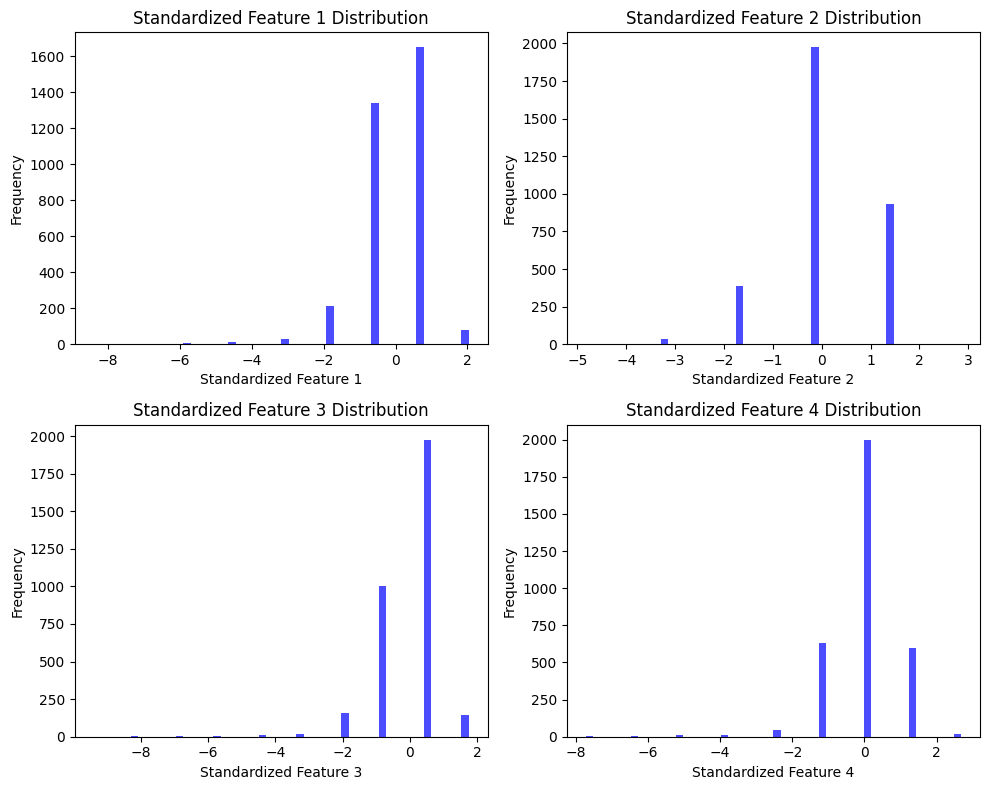

In [9]:
import matplotlib.pyplot as plt

# Assuming scaled_data has shape (n_samples, n_features)
n_features = scaled_data.shape[1]

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Create histograms for the first four features
for i in range(min(4, n_features)):
    axes[i].hist(scaled_data[:, i], bins=50, color='blue', alpha=0.7)
    axes[i].set_title(f'Standardized Feature {i+1} Distribution')
    axes[i].set_xlabel(f'Standardized Feature {i+1}')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


This shows us that generally there are not too many outliers and standardisation is good. 

In [10]:
print("Shape of scaled_data:", scaled_data.shape)
print("Shape of y:", y.shape)
print("NaN or missing values in scaled_data:", np.isnan(scaled_data).any())
print("Missing values in y:", y.isnull().any().any())

Shape of scaled_data: (3332, 5)
Shape of y: (3332,)
NaN or missing values in scaled_data: False
Missing values in y: False


In [11]:
# Assuming X is your DataFrame with columns 'aroma', 'body', 'flavor', 'acid', and 'aftertaste'
categorical_columns = ['aroma', 'body', 'flavor', 'acid', 'aftertaste']

# Use get_dummies to one-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, dtype=int)

# Concatenate the one-hot encoded columns to the original DataFrame
X = pd.concat([X, X_encoded], axis=1)

# Display the resulting DataFrame
X

,aroma,body,flavor,acid,aftertaste,aroma_2.0,aroma_3.0,aroma_4.0,aroma_5.0,aroma_6.0,...,acid_10.0,aftertaste_2.0,aftertaste_3.0,aftertaste_4.0,aftertaste_5.0,aftertaste_6.0,aftertaste_7.0,aftertaste_8.0,aftertaste_9.0,aftertaste_10.0
0,9.0,9.0,9.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.0,9.0,10.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9.0,9.0,9.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,9.0,9.0,9.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,9.0,9.0,9.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,8.0,8.0,8.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4103,8.0,8.0,8.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4104,7.0,7.0,6.0,7.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4105,7.0,7.0,7.0,7.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
# Check shape of all data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("NaN or missing values in scaled_data:", np.isnan(scaled_data).any())
print("Missing values in y:", y.isnull().any().any())

Shape of X: (3332, 48)
Shape of y: (3332,)
NaN or missing values in scaled_data: False
Missing values in y: False


In [13]:
#Split the data into training and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42, shuffle=False)

In [14]:
# Check shape of all data
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)
print("NaN or missing values in scaled_data:", np.isnan(scaled_data).any())
print("Missing values in y:", y.isnull().any().any())

Shape of X: (2665, 5)
Shape of y: (2665,)
NaN or missing values in scaled_data: False
Missing values in y: False


In [15]:
# Calculate the cosine similarity matrix for the entire dataset
similarity_matrix = cosine_similarity(X)

# Calculate the index of the most similar item for each item
predictions = similarity_matrix.argmax(axis=1)


In [16]:
# Create a ground truth column for interactions (1 for interaction, 0 for no interaction)
X['interactions'] = np.random.choice([0, 1], size=len(X), p=[0.8, 0.2])

# Print the DataFrame to see the changes
print(X)


      aroma  body  flavor  acid  aftertaste  aroma_2.0  aroma_3.0  aroma_4.0  \
0       9.0   9.0     9.0   8.0         8.0          0          0          0   
2       9.0   9.0    10.0   8.0         8.0          0          0          0   
3       9.0   9.0     9.0   8.0         8.0          0          0          0   
5       9.0   9.0     9.0   8.0         8.0          0          0          0   
6       9.0   9.0     9.0   8.0         8.0          0          0          0   
...     ...   ...     ...   ...         ...        ...        ...        ...   
4102    8.0   8.0     8.0   8.0         8.0          0          0          0   
4103    8.0   8.0     8.0   8.0         8.0          0          0          0   
4104    7.0   7.0     6.0   7.0         7.0          0          0          0   
4105    7.0   7.0     7.0   7.0         7.0          0          0          0   
4106    7.0   7.0     8.0   7.0         7.0          0          0          0   

      aroma_5.0  aroma_6.0  ...  aftert

In [17]:
print("Shape of similarity_matrix:", similarity_matrix.shape)
print("Shape of predictions:", predictions.shape)
print(X['interactions'].shape)

Shape of similarity_matrix: (3332, 3332)
Shape of predictions: (3332,)
(3332,)


In [19]:
# Assume 'N' is the number of top recommendations you want
# Assuming X is a DataFrame
recommended_items = X.iloc[predictions]

N = 5

# Get the top N recommendations for each test item
top_n_recommendations = np.argsort(-similarity_matrix, axis=0)[:N, :]
top_n_recommendations

array([[   0,  427,    0, ..., 3329, 2446, 3331],
       [ 334,  399,  334, ..., 2182, 3236, 3155],
       [ 333, 1276,  333, ..., 3238, 3050, 2609],
       [ 591,  582,  591, ..., 1995, 3232, 3296],
       [ 592, 2107,  592, ..., 3050, 1652, 1595]], dtype=int64)

In [20]:
threshold = 0.7
binary_predictions = (similarity_matrix > threshold).astype(int)

In [24]:
def calculate_precision(predictions, labels):
    true_positives = np.sum((predictions == 1) & (labels == 1))
    false_positives = np.sum((predictions == 1) & (labels == 0))

    # Avoid division by zero
    if (true_positives + false_positives) == 0:
        precision = 0
    else:
        precision = true_positives / (true_positives + false_positives)

    return precision


In [23]:
labels = X['interactions'].values

In [25]:
precision = calculate_precision(predictions, labels)
print(f"Precision: {precision}")

Precision: 0.05555555555555555
